<a href="https://colab.research.google.com/github/albayo/Ajedrez/blob/main/PR2_con72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Parte Obligatoria.

In [1]:
# !pip install icevision[all] -Uq

In [2]:
# from icevision.all import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



El proceso para crear y evaluar un modelo de IceVision consta de los siguientes pasos:
1. Crear un parser para leer las imágenes y las anotaciones.
2. Construir objetos record a partir de los parser. 
3. Crear los datasets a partir de los records y los aumentos que queramos aplicar. 
4. Crear un dataloader a partir de los datasets. 
5. Definir un modelo. 
6. Entrenar el modelo. 
7. Guardar el modelo.
8. Usar el modelo para inferencia

Vamos a ver en detalle cada uno de estos pasos. 

In [4]:
# path = Path('drive/MyDrive/IA/Entregable2')

In [5]:
# template_record = ObjectDetectionRecord()

In [6]:
# Parser.generate_template(template_record)


In [7]:
# # Cargamos la siguiente librería que nos servirá para leer ficheros XML
# import xml.etree.ElementTree as ET

# class MyParser(Parser):
#     """Definimos el constructor de nuestra clase que va a recibir cuatro parámetros:
#        - La plantilla definida previamente.
#        - El path al directorio donde se encuentran las imágenes.
#        - El path al directorio donde se encuentran las anotaciones.
#        - Un objeto class_map con las clases que tiene nuestro dataset.
#     """
#     def __init__(self, template_record,path_img,path_anotaciones,class_map):
#         super().__init__(template_record=template_record)
#         self.path_img = path_img
#         self.path_anotaciones= path_anotaciones
#         self.class_map = class_map

#     """El método iter escanea el directorio de anotaciones y nos devuelve el nombre 
#     de cada fichero. Dicho nombre será utilizado por el resto de método"""    
#     def __iter__(self):
#         with os.scandir(self.path_anotaciones) as ficheros:
#             for fichero in ficheros:
#                 yield fichero.name
                
#     """El método len nos indica el número de elementos de los que consta nuestro 
#     dataset"""
#     def __len__(self):
#         return len(self.path_anotaciones)

#     """A partir del nombre del fichero de anotación, record_id debe devolver el identificador
#     (o nombre) de la imagen asociada"""
#     def record_id(self, o) -> Hashable: #o --> nombre de la anotación
#         return o[:o.find('.')]

#     """A continuación deberíamos definir el método parse_fields, pero vamos a definir una serie
#     de definiciones previas que nos serán útiles"""

#     """El método prepare recibe el nombre de un fichero de anotación como parámetro y realiza
#     una serie de labores de preprocesamiento sobre dicho fichero de anotación. En este caso lo procesa
#     usando la funcionalidad de la librería para trabajar con xml"""
#     def prepare(self, o):
#         tree = ET.parse(str(self.path_anotaciones)+'/'+str(o))
#         self._root = tree.getroot()

#     """El método filepath a partir del nombre del fichero de anotación devuelve el path de 
#     la imagen asociada"""
#     def filepath(self, o) -> Union[str, Path]:
#         path=Path(f"{o[:o.find('.')]}.jpg")
#         return self.path_img / path

#     """La función image_width_height devuelve el ancho y el alto de una imagen a partir del nombre
#     del fichero de anotación"""
#     def image_width_height(self, o) -> Tuple[int, int]:
#         return get_img_size(str(self.path_img)+'/'+f"{o[:o.find('.')]}.jpg")

#     """La función labels recibe el nombre del fichero de anotación y debe devolver una lista 
#     con los identificadores de las clases contenidas en dicho fichero."""
#     def labels(self, o) -> List[int]:
#         labels = []
#         for object in self._root.iter("object"):
#             label = object.find("name").text
#             label_id = self.class_map.get_by_name(label)
#             labels.append(label)

#         return labels

#     """La función bboxes recibe el nombre del fichero de anotación y debe devolver una lista 
#     de bboxes que son las anotaciones contenidas en dicho fichero. El formato de cada BBOX es
#     xmin, ymin, xmax, ymax."""
#     def bboxes(self, o) -> List[BBox]:
#         def to_int(x):
#             return int(float(x))

#         bboxes = []
#         for object in self._root.iter("object"):
#             xml_bbox = object.find("bndbox")
#             xmin = to_int(xml_bbox.find("xmin").text)
#             ymin = to_int(xml_bbox.find("ymin").text)
#             xmax = to_int(xml_bbox.find("xmax").text)
#             ymax = to_int(xml_bbox.find("ymax").text)

#             bbox = BBox.from_xyxy(xmin, ymin, xmax, ymax)
#             bboxes.append(bbox)

#         return bboxes


#     """Definimos a continuación el método parse_fields para cada elemento de nuestro 
#     dataset proporcionamos:
#        - El path a la imagen.
#        - El tamaño de la imagen.
#        - El mapa de clases.
#        - Los rectángulos que indican cada uno de los objetos de la imagen.
#        - Las etiquetas de cada uno de los objetos de la imagen."""
#     def parse_fields(self, o: Any, record: BaseRecord, is_new: bool):
#         self.prepare(o)
#         if is_new:
#             record.set_filepath(self.filepath(o))
#             record.set_img_size(self.image_width_height(o))
#             record.detection.set_class_map(self.class_map)
#         record.detection.add_bboxes(self.bboxes(o))
#         record.detection.add_labels(self.labels(o))

In [8]:
# class_map=ClassMap(['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9'])

In [9]:
# # trainPath=Path('drive/MyDrive/IA/Entregable2')/'train'
# # parserTrain = MyParser(template_record, trainPath/'images', trainPath/'labels', class_map)

# testPath = Path('drive/MyDrive/IA/Entregable2')/'test'
# parserTest = MyParser(template_record,testPath/'images', testPath/'labels', class_map)

In [10]:
# train_records, valid_records = parserTrain.parse(RandomSplitter((0.9, 0.1)))
# test_records,_= parserTest.parse(RandomSplitter((1.0, 0.0)))

In [11]:
# %%capture
# !wget https://www.dropbox.com/s/1dsfd5rrmg3riqj/fruits.zip?dl=1 -O fruits.zip
# !unzip fruits.zip

### Ampliaciones: instrucciones

In [12]:
!pip install fastai -Uq

In [13]:
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

In [14]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

In [15]:
trainPath = Path('drive/MyDrive/IA/Entregable2')


In [16]:
# Error raro -->https://github.com/facebookresearch/detectron2/issues/2231

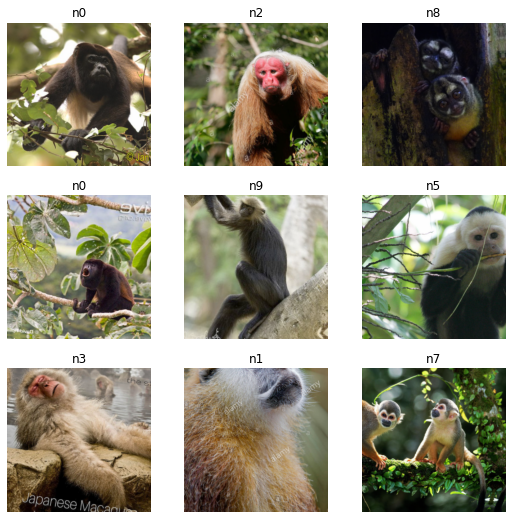

In [17]:

dls = db.dataloaders(trainPath,bs=128)
dls.show_batch()

### Creamos el modelo de predicción

In [18]:
learn = cnn_learner(dls,resnet18,metrics=accuracy).to_fp16()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [20]:
learn.fine_tune(10,base_lr=1e-3)
learn.export()


epoch,train_loss,valid_loss,accuracy,time
0,3.219187,1.158426,0.652015,03:01


epoch,train_loss,valid_loss,accuracy,time
0,1.247229,0.462644,0.886447,00:56
1,0.986972,0.156957,0.967033,00:59
2,0.721457,0.068578,0.989011,00:59
3,0.553191,0.046117,0.989011,00:58
4,0.434538,0.036733,0.992674,00:55
5,0.347688,0.029764,0.992674,00:58
6,0.289636,0.028308,0.992674,00:58
7,0.248019,0.028532,0.992674,00:56
8,0.216439,0.028538,0.992674,00:55
9,0.189394,0.029318,0.992674,00:55


In [21]:
Path().ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:

interp = ClassificationInterpretation.from_learner(learn)


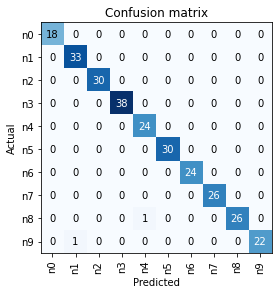

In [23]:
interp.plot_confusion_matrix()

In [24]:
path = Path('/content/drive/MyDrive/IA/Entregable2')

In [25]:
path = Path('/content/drive/MyDrive/IA/Entregable2/validation')
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 get_y=parent_label,
                #  splitter=GrandparentSplitter(valid_name='validation'),
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)


Ya tenemos los dataloaders

In [27]:
# model = models.torchvision.faster_rcnn.model(backbone=models.torchvision.faster_rcnn.backbones.resnet18_fpn(pretrained=True),
#                                        num_classes=len(class_map))

In [28]:
learn.dls = dlsTest

In [29]:
learn.validate()

(#2) [1.0193934440612793,0.7222222089767456]

Vemos que el accuracy que es el segundo valor, es de un 72.22%, para mejorarlo habría que limpiar el dataset.

In [33]:
# Esto es el códiigo que deberia  de ser --> pero da error
# path = Path('/content/drive/MyDrive/IA/Entregable2')
# dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
#                  get_items=get_image_files, 
#                  get_y=parent_label,
#                   splitter=GrandparentSplitter(valid_name='validation'),
#                  item_tfms = Resize(256),
#                  batch_tfms=aug_transforms(size=128,min_scale=0.75))
# dlsTest = dbTest.dataloaders(path,bs=128)
# learn.dls = dlsTest
# learn.validate()